<h1 style="text-align:center; color:#000000; font-weight:bold;">Heart Disease Classification</h1>

# Dataset Description

- **Target variable >"HeartDisease" :** 1 indicates the presence and 0 indicates the absence of these health conditions.
- **"ID" :** an ID for the row
- **"Person_Story" :** A description of the person.
- **"Age_Category" :** categorizes individuals into age groups (e.g., "Senior," "Older," "Middle").
- **"BMI" :** Stands for Body Mass Index and represents a numerical measure of a person's body composition.
- **"DiabeticORABS" :** indicates the presence or absence of diabetes.
- **"SkinCancerORABS" :** indicates the presence or absence of skin cancer.
- **"Stroke" :** indicates whether the person has had a stroke ("Yes" or "No").
- **"PhysicalHealth" :** and "MentalHealth" seem to be measures of physical and mental health.
- **"PhysicalActivity" :** represents whether the person engages in physical activity ("Yes" or "No").
- **"DiffWalking" :** Indicate any difficulties in walking.
- **"TimeOfSleep" :** is Related to the amount of sleep the person gets.
- **"Asthma" and "KidneyDisease" :** indicate the presence or absence of these health conditions.

# Import libraries

In [1]:
# Cleaning and Viualization Libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# ml tools
from sklearn.preprocessing import (StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   OneHotEncoder,
                                   RobustScaler,
                                   LabelEncoder,
                                   power_transform,
                                   FunctionTransformer)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import ( cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV,
                                     StratifiedKFold,
                                    RandomizedSearchCV)

from sklearn.pipeline import Pipeline , make_pipeline
from scipy.stats import randint
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import (RandomForestClassifier,
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# metrics
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve,
                             log_loss,
                             classification_report,
                             confusion_matrix)

## Remove Warning

In [3]:
import warnings
warnings.simplefilter("ignore")

# Reading the data

In [4]:
train = pd.read_csv('IEEE_competition.csv')
test = pd.read_csv('test_data.csv')

train.head(10)

,ID,Person_Story,Age_Category,BMI,DiabeticORABS,SkinCancerORABS,Stroke,PhysicalHealth,MentalHealth,PhysicalActivity,DiffWalking,TImEOFSLeeP,Asthma,KidneyDisease,HeartDisease
0,0,"Once upon a time, there was a Female person of...",Middle,29.29,Absence,Absence,NaN,0.0,5.0,Yes,NaN,6.0,No,No,Absence
1,1,"Once upon a time, there was a Female person of...",Middle,33.09,Absence,Absence,No,0.0,20.0,Yes,No,9.0,No,No,Absence
2,2,"Once upon a time, there was a Male person of O...",Younger,28.19,Absence,Absence,No,0.0,0.0,Yes,No,7.0,No,No,Absence
3,3,"Once upon a time, there was a Male person of W...",Middle,36.62,Absence,Absence,No,0.0,0.0,No,No,6.0,No,No,Absence
4,4,"Once upon a time, there was a Male person of W...",Middle,33.38,Absence,Absence,Yes,12.0,20.0,No,No,4.0,Yes,No,Absence
5,5,"Once upon a time, there was a Female person of...",Senior,24.69,Presence,Absence,No,30.0,30.0,No,Yes,9.0,No,No,Absence
6,6,"Once upon a time, there was a Male person of B...",Younger,33.96,Presence,Absence,No,3.0,25.0,No,No,5.0,No,No,Absence
7,7,"Once upon a time, there was a Female person of...",Older,22.46,Absence,Absence,No,1.0,0.0,NaN,NaN,7.0,No,No,Absence
8,8,"Once upon a time, there was a Female person of...",Middle,25.79,Presence,Absence,NaN,0.0,0.0,Yes,No,8.0,No,No,Absence
9,9,"Once upon a time, there was a Female person of...",Younger,28.13,Absence,Absence,No,0.0,0.0,NaN,NaN,7.0,No,No,Absence


* It appears that the Person_Story column contains data that requires some adjustments and extraction of information.

# EDA

In [5]:
train.shape

(207862, 15)

In [6]:
test.shape

(111766, 14)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207862 entries, 0 to 207861
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                207862 non-null  int64  
 1   Person_Story      207552 non-null  object 
 2   Age_Category      207552 non-null  object 
 3   BMI               207552 non-null  float64
 4   DiabeticORABS     207552 non-null  object 
 5   SkinCancerORABS   207552 non-null  object 
 6   Stroke            147832 non-null  object 
 7   PhysicalHealth    207552 non-null  float64
 8   MentalHealth      207552 non-null  float64
 9   PhysicalActivity  159410 non-null  object 
 10  DiffWalking       153948 non-null  object 
 11  TImEOFSLeeP       207552 non-null  float64
 12  Asthma            207552 non-null  object 
 13  KidneyDisease     207552 non-null  object 
 14  HeartDisease      207552 non-null  object 
dtypes: float64(4), int64(1), object(10)
memory usage: 23.8+ MB


* The data types seem appropriate for the columns based on the information provided.

In [8]:
# This function shows the unique values of the data
def get_unique_values(df):
    unique_values_dict = {}
    for col in df.columns:
        unique_values_dict[col] = df[col].unique()
    return unique_values_dict

In [9]:
# I will display the unique values for the 'Person_Story' column as I believe it may require some adjustments.
unique_values = get_unique_values(train)

print(unique_values['Person_Story'][0 : 4])

["Once upon a time, there was a Female person of Black ethnicity. This individual was known for their healthy lifestyle and their abstinence from alcohol. Their general health condition was described as 'Very good'. People often marveled at their unique journey through life."
 "Once upon a time, there was a Female person of White ethnicity. This individual was known for their smoking habit and their fondness for alcohol. Their general health condition was described as 'Very good'. People often marveled at their unique journey through life."
 "Once upon a time, there was a Male person of Other ethnicity. This individual was known for their healthy lifestyle and their abstinence from alcohol. Their general health condition was described as 'Good'. People often marveled at their unique journey through life."
 "Once upon a time, there was a Male person of White ethnicity. This individual was known for their healthy lifestyle and their abstinence from alcohol. Their general health condition

* It seems like there is valuable information that can be extracted from this column.

In [10]:
train.nunique().sort_values(ascending=False)

ID                  207862
BMI                   3277
Person_Story           236
PhysicalHealth          31
MentalHealth            31
TImEOFSLeeP             23
Age_Category             4
DiabeticORABS            4
SkinCancerORABS          2
Stroke                   2
PhysicalActivity         2
DiffWalking              2
Asthma                   2
KidneyDisease            2
HeartDisease             2
dtype: int64

In [11]:
test.nunique().sort_values(ascending=False)

ID                  111766
BMI                   2896
Person_Story           231
PhysicalHealth          31
MentalHealth            31
TImEOFSLeeP             23
Age_Category             4
DiabeticORABS            4
SkinCancerORABS          2
Stroke                   2
PhysicalActivity         2
DiffWalking              2
Asthma                   2
KidneyDisease            2
dtype: int64

* All columns have reasonable unique values except for 'BMI', which has 3,277 unique values. This seems unusually high and may require correction

**I'm going to work on the BMI and Person_Story columns.**

## Discretization

### BMI

In [12]:
#This function Discretize the 'BMI' column into categories: Underweight, Normal Weight, Overweight, Obese .

def Discretizer(df):
    df['BMI'] = pd.cut(df['BMI'], 
                       bins=[0, 18.5, 24.9, 29.9, float('inf')], 
                       labels=['Underweight', 'Normal Weight', 'Overweight', 'Obese'], 
                       right=False)
    # this turns its type into object.
    df['BMI'] = df['BMI'].astype('object')

In [13]:
Discretizer(train)

In [14]:
train['BMI'].unique()

array(['Overweight', 'Obese', 'Normal Weight', 'Underweight', nan],
      dtype=object)

In [15]:
Discretizer(test)

In [16]:
test['BMI'].unique()

array(['Normal Weight', 'Obese', 'Overweight', 'Underweight'],
      dtype=object)

## Feature Extraction

### Person Story

In [17]:
""" 

This function extract specific details that seems important such as
ethnicity, gender, lifestyle, alcohol consumption, and general health condition. 
It iterates through each person_story, while using regular expressions to find the relevant information.
If a pattern is found, it is appended to the corresponding list. If a story is not a valid string, 'None' values are appended.
Finally, the extracted information is organized into a DataFrame to make it easy to add it to my main df.


"""
def extract_information(data):
    ethnicity_list = []
    gender_list = []
    lifestyle_list = []
    alcohol_list = []
    health_condition_list = []

    for story in data:
        if isinstance(story, str): 
            
            # Extract Ethnicity
            try:
                ethnicity = re.search(r'person of (\w+)', story).group(1)
            except AttributeError:
                ethnicity = None
            ethnicity_list.append(ethnicity)

            # Extract Gender
            try:
                gender = re.search(r'a (Female|Male) person', story).group(1)
            except AttributeError:
                gender = None
            gender_list.append(gender)

            # Extract Lifestyle
            try:
                lifestyle = re.search(r'known for their (\w+)', story).group(1)
            except AttributeError:
                lifestyle = None
            lifestyle_list.append(lifestyle)

            # Extract Alcohol Consumption
            try:
                alcohol = re.search(r'(abstinence from alcohol|fondness for alcohol)', story).group(1)
            except AttributeError:
                alcohol = None
            alcohol_list.append(alcohol)

            # Extract General Health Condition
            try:
                health_condition = re.search(r'condition was described as \'(.+?)\'', story).group(1)
            except AttributeError:
                health_condition = None
            health_condition_list.append(health_condition)
        else:
            # If person_story is not a valid string, append None to all lists
            ethnicity_list.append(None)
            gender_list.append(None)
            lifestyle_list.append(None)
            alcohol_list.append(None)
            health_condition_list.append(None)

    # Create a DataFrame to store the extracted information
    df = pd.DataFrame({
        'Ethnicity': ethnicity_list,
        'Gender': gender_list,
        'Lifestyle': lifestyle_list,
        'Alcohol_Consumption': alcohol_list,
        'Health': health_condition_list
    })

    return df

In [18]:
data = train['Person_Story'].tolist()

# applying the extractiation function on the Person_Story column
df = extract_information(data)

# adding the new columns to our data
train = pd.concat([train, df], axis=1)

# dropping the Person_Story column
train.drop(columns=['Person_Story'], inplace=True)

In [19]:
data = test['Person_Story'].tolist()

# applying the extractiation function on the Person_Story column
df = extract_information(data)

# adding the new columns to our data
test = pd.concat([test, df], axis=1)

# dropping the Person_Story column
test.drop(columns=['Person_Story'], inplace=True)

## Duplicates & Null values

In [20]:
# The 'ID' column is not relevant for EDA and preprocessing and may cause issues so i will drop it.
train = train.drop(columns='ID', errors='ignore')

In [21]:
train.duplicated().sum()

63447

In [22]:
test.duplicated().sum()

0

* There appears to be a significant number of duplicates, so I will remove them.

In [23]:
train.drop_duplicates(inplace = True, keep = False)

In [24]:
train.isnull().sum().sort_values(ascending=False)

Stroke                 38926
DiffWalking            33179
PhysicalActivity       29565
Age_Category               0
KidneyDisease              0
Alcohol_Consumption        0
Lifestyle                  0
Gender                     0
Ethnicity                  0
HeartDisease               0
TImEOFSLeeP                0
Asthma                     0
BMI                        0
MentalHealth               0
PhysicalHealth             0
SkinCancerORABS            0
DiabeticORABS              0
Health                     0
dtype: int64

In [25]:
train.isnull().sum().sort_values(ascending=False)/len(train)*100

Stroke                 30.904934
DiffWalking            26.342157
PhysicalActivity       23.472855
Age_Category            0.000000
KidneyDisease           0.000000
Alcohol_Consumption     0.000000
Lifestyle               0.000000
Gender                  0.000000
Ethnicity               0.000000
HeartDisease            0.000000
TImEOFSLeeP             0.000000
Asthma                  0.000000
BMI                     0.000000
MentalHealth            0.000000
PhysicalHealth          0.000000
SkinCancerORABS         0.000000
DiabeticORABS           0.000000
Health                  0.000000
dtype: float64

In [26]:
test.isnull().sum().sort_values(ascending=False)

Stroke                 32388
DiffWalking            29024
PhysicalActivity       25950
TImEOFSLeeP                0
Alcohol_Consumption        0
Lifestyle                  0
Gender                     0
Ethnicity                  0
KidneyDisease              0
Asthma                     0
ID                         0
Age_Category               0
MentalHealth               0
PhysicalHealth             0
SkinCancerORABS            0
DiabeticORABS              0
BMI                        0
Health                     0
dtype: int64

In [27]:
test.isnull().sum().sort_values(ascending=False)/len(train)*100

Stroke                 25.714150
DiffWalking            23.043333
PhysicalActivity       20.602760
TImEOFSLeeP             0.000000
Alcohol_Consumption     0.000000
Lifestyle               0.000000
Gender                  0.000000
Ethnicity               0.000000
KidneyDisease           0.000000
Asthma                  0.000000
ID                      0.000000
Age_Category            0.000000
MentalHealth            0.000000
PhysicalHealth          0.000000
SkinCancerORABS         0.000000
DiabeticORABS           0.000000
BMI                     0.000000
Health                  0.000000
dtype: float64

* The columns 'Stroke', 'DiffWalking', and 'PhysicalActivity' contain a significant number of NaN values,  which will require attention and resolution at a later stage.

In [28]:
train.shape

(125954, 18)

## Distirbution of the Label

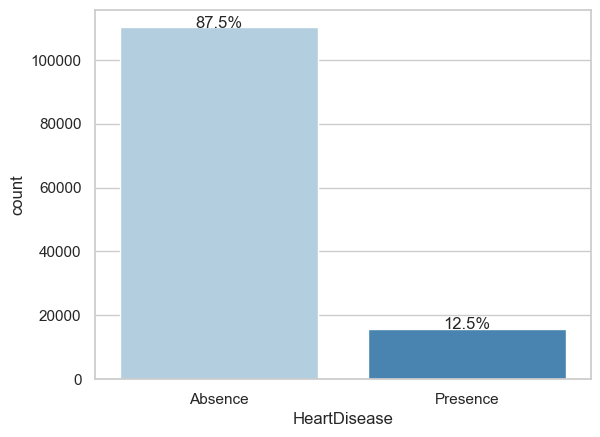

In [29]:
ax = sns.countplot(x="HeartDisease", data=train, palette="Blues")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{height / len(train):.1%}', ha="center")

plt.show()

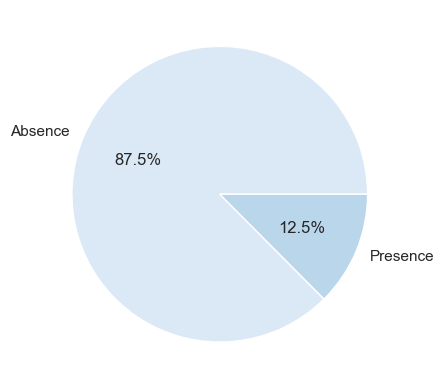

In [30]:
plt.pie(train.HeartDisease.value_counts(), labels = ["Absence", "Presence"],colors = sns.color_palette("Blues"), autopct = '%1.1f%%')
pass

**Looks like we have imbalanced data so we will try some techniques like :**

* Oversampling with smote.
* Use Boosting models that are suited for imbalanced data like XGB.

In [31]:
# splitting the data into cat and num to make it easier in EDA

train_num_features = train.select_dtypes(include=['float64', 'int64']).columns

train_cat_features = train.select_dtypes(include=['object']).columns

In [32]:
train[train_num_features].describe()

,PhysicalHealth,MentalHealth,TImEOFSLeeP
count,125954.000000,125954.000000,125954.000000
mean,5.374843,5.835249,7.027534
std,9.495966,9.278071,1.693830
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,6.000000
50%,0.000000,1.000000,7.000000
75%,5.000000,7.000000,8.000000
max,30.000000,30.000000,24.000000


In [33]:
train.describe(include = object)

,Age_Category,BMI,DiabeticORABS,SkinCancerORABS,Stroke,PhysicalActivity,DiffWalking,Asthma,KidneyDisease,HeartDisease,Ethnicity,Gender,Lifestyle,Alcohol_Consumption,Health
count,125954,125954,125954,125954,87028,96389,92775,125954,125954,125954,125954,125954,125954,125954,125954
unique,4,4,4,2,2,2,2,2,2,2,6,2,2,2,5
top,Older,Obese,Absence,Absence,No,Yes,No,No,No,Absence,White,Female,healthy,abstinence from alcohol,Good
freq,38444,46498,97680,111618,79453,60219,66238,101859,118543,110153,88134,69758,67176,114407,42251


In [34]:
# This plot shows the distirbution of the data with KDE_PLOT for num _values and COUNT_PLOT for cat_values

def plot_dist(df, cat_features, num_features):
    
    # Plot count plots for categorical variables
    fig, axes = plt.subplots(8, 2, figsize=(15, 20))
    
    for i, column in enumerate(cat_features):
        row = i // 2
        col = i % 2
        sns.countplot(x=column, data=df, ax=axes[row, col])
        axes[row, col].set_title(f'count Plot for {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Plot KDE plots for numerical variables
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    for i, column in enumerate(num_features):
        row = i // 2
        col = i % 2
        sns.kdeplot(x=column, data=df, ax=axes[row, col])
        axes[row, col].set_title(f'KDE Plot for {column}')
    
    plt.tight_layout()
    plt.show()

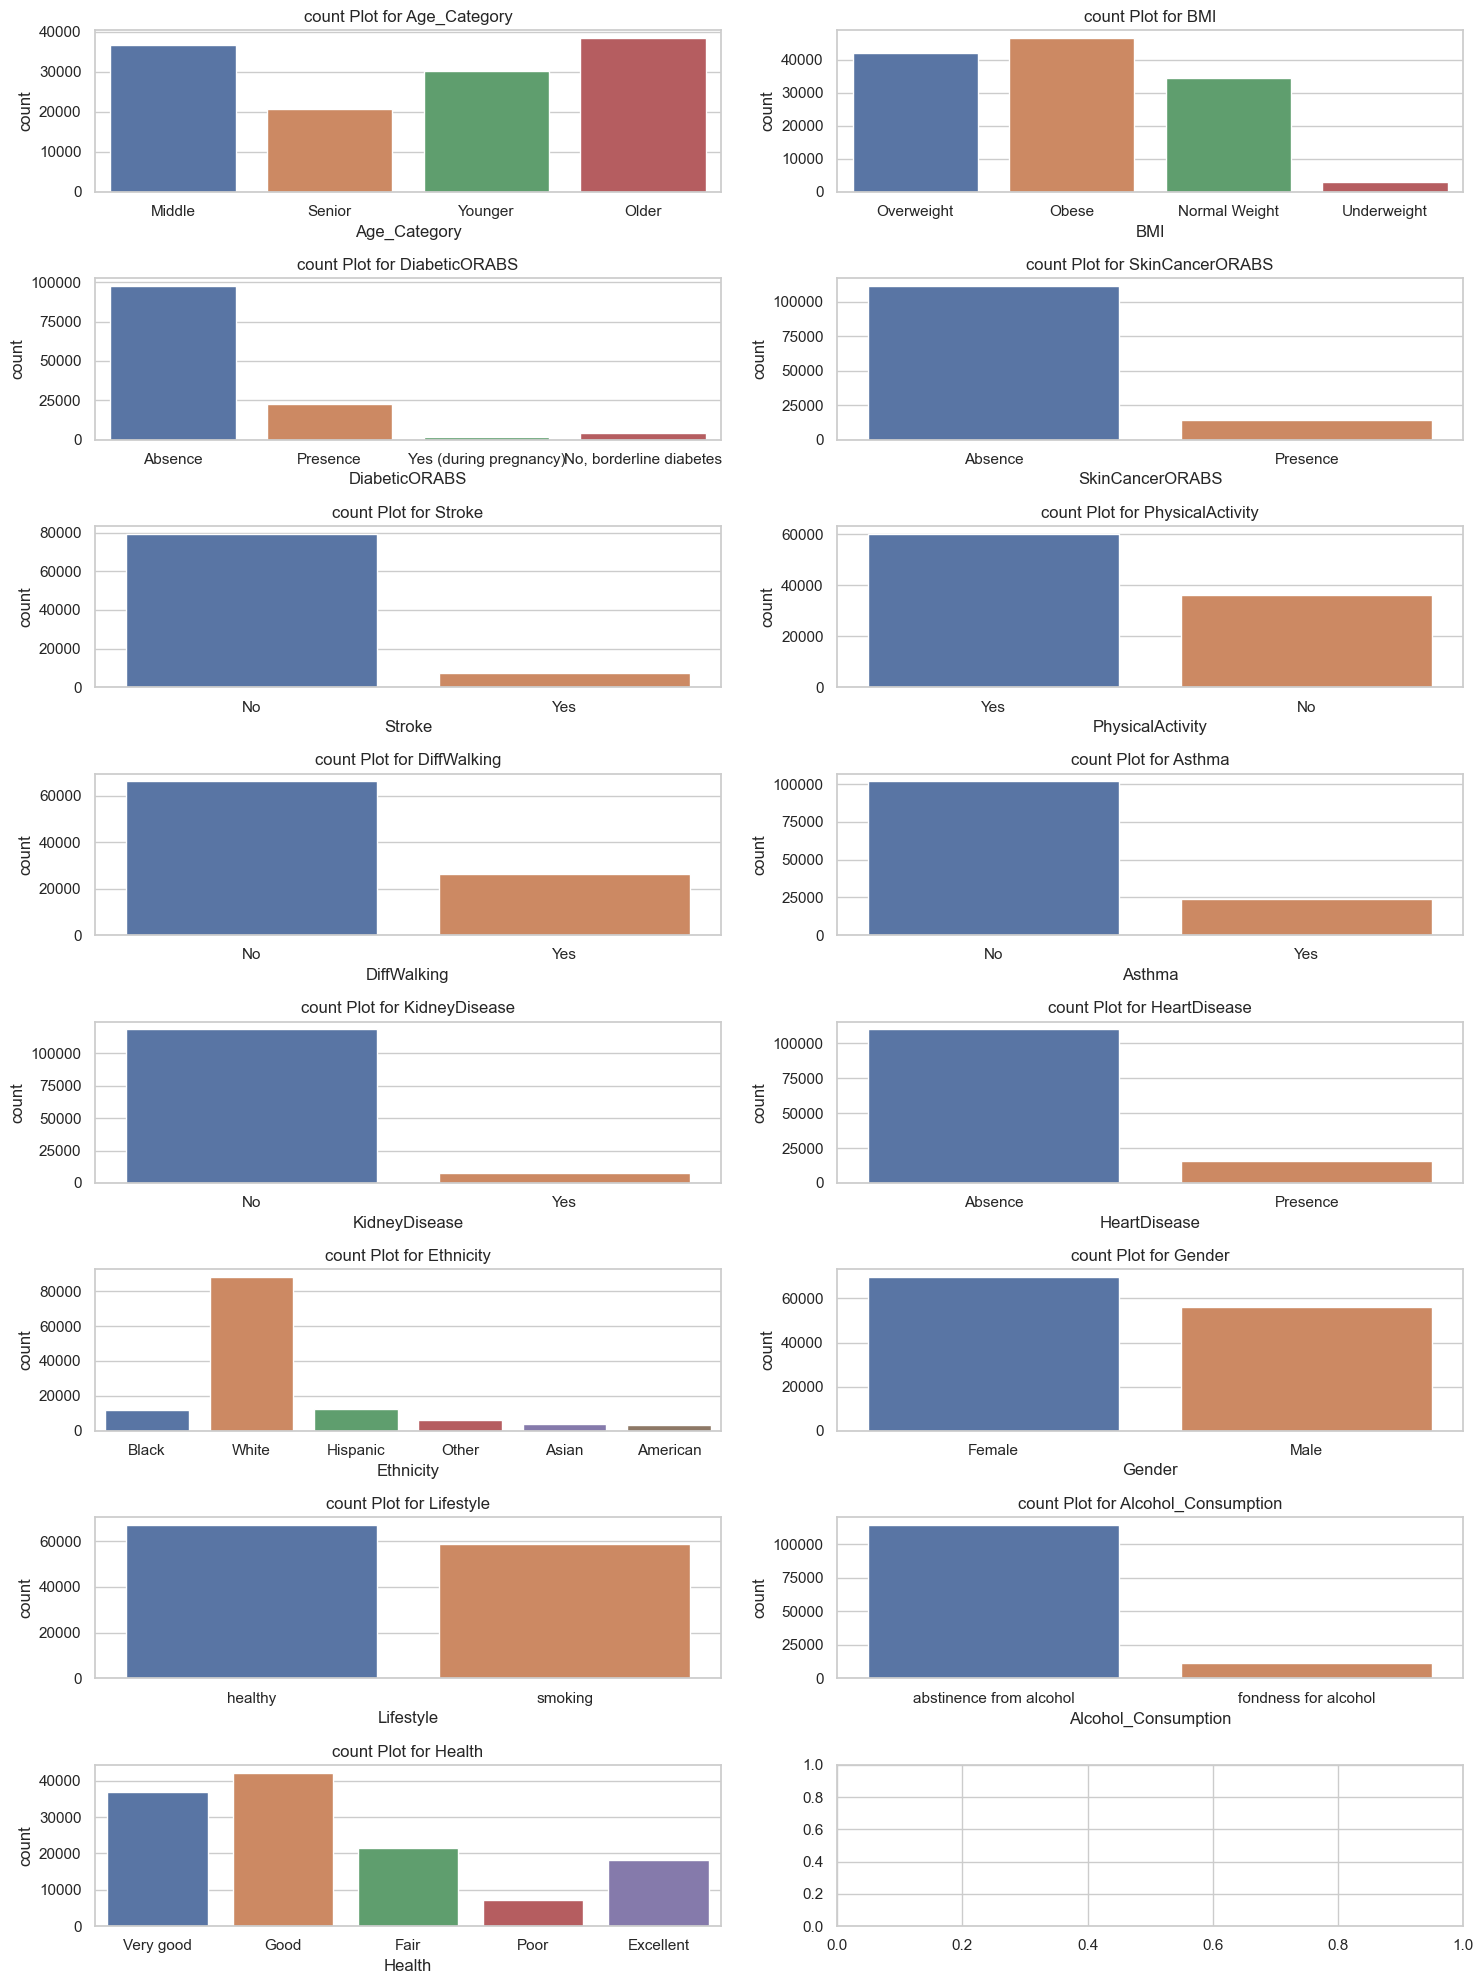

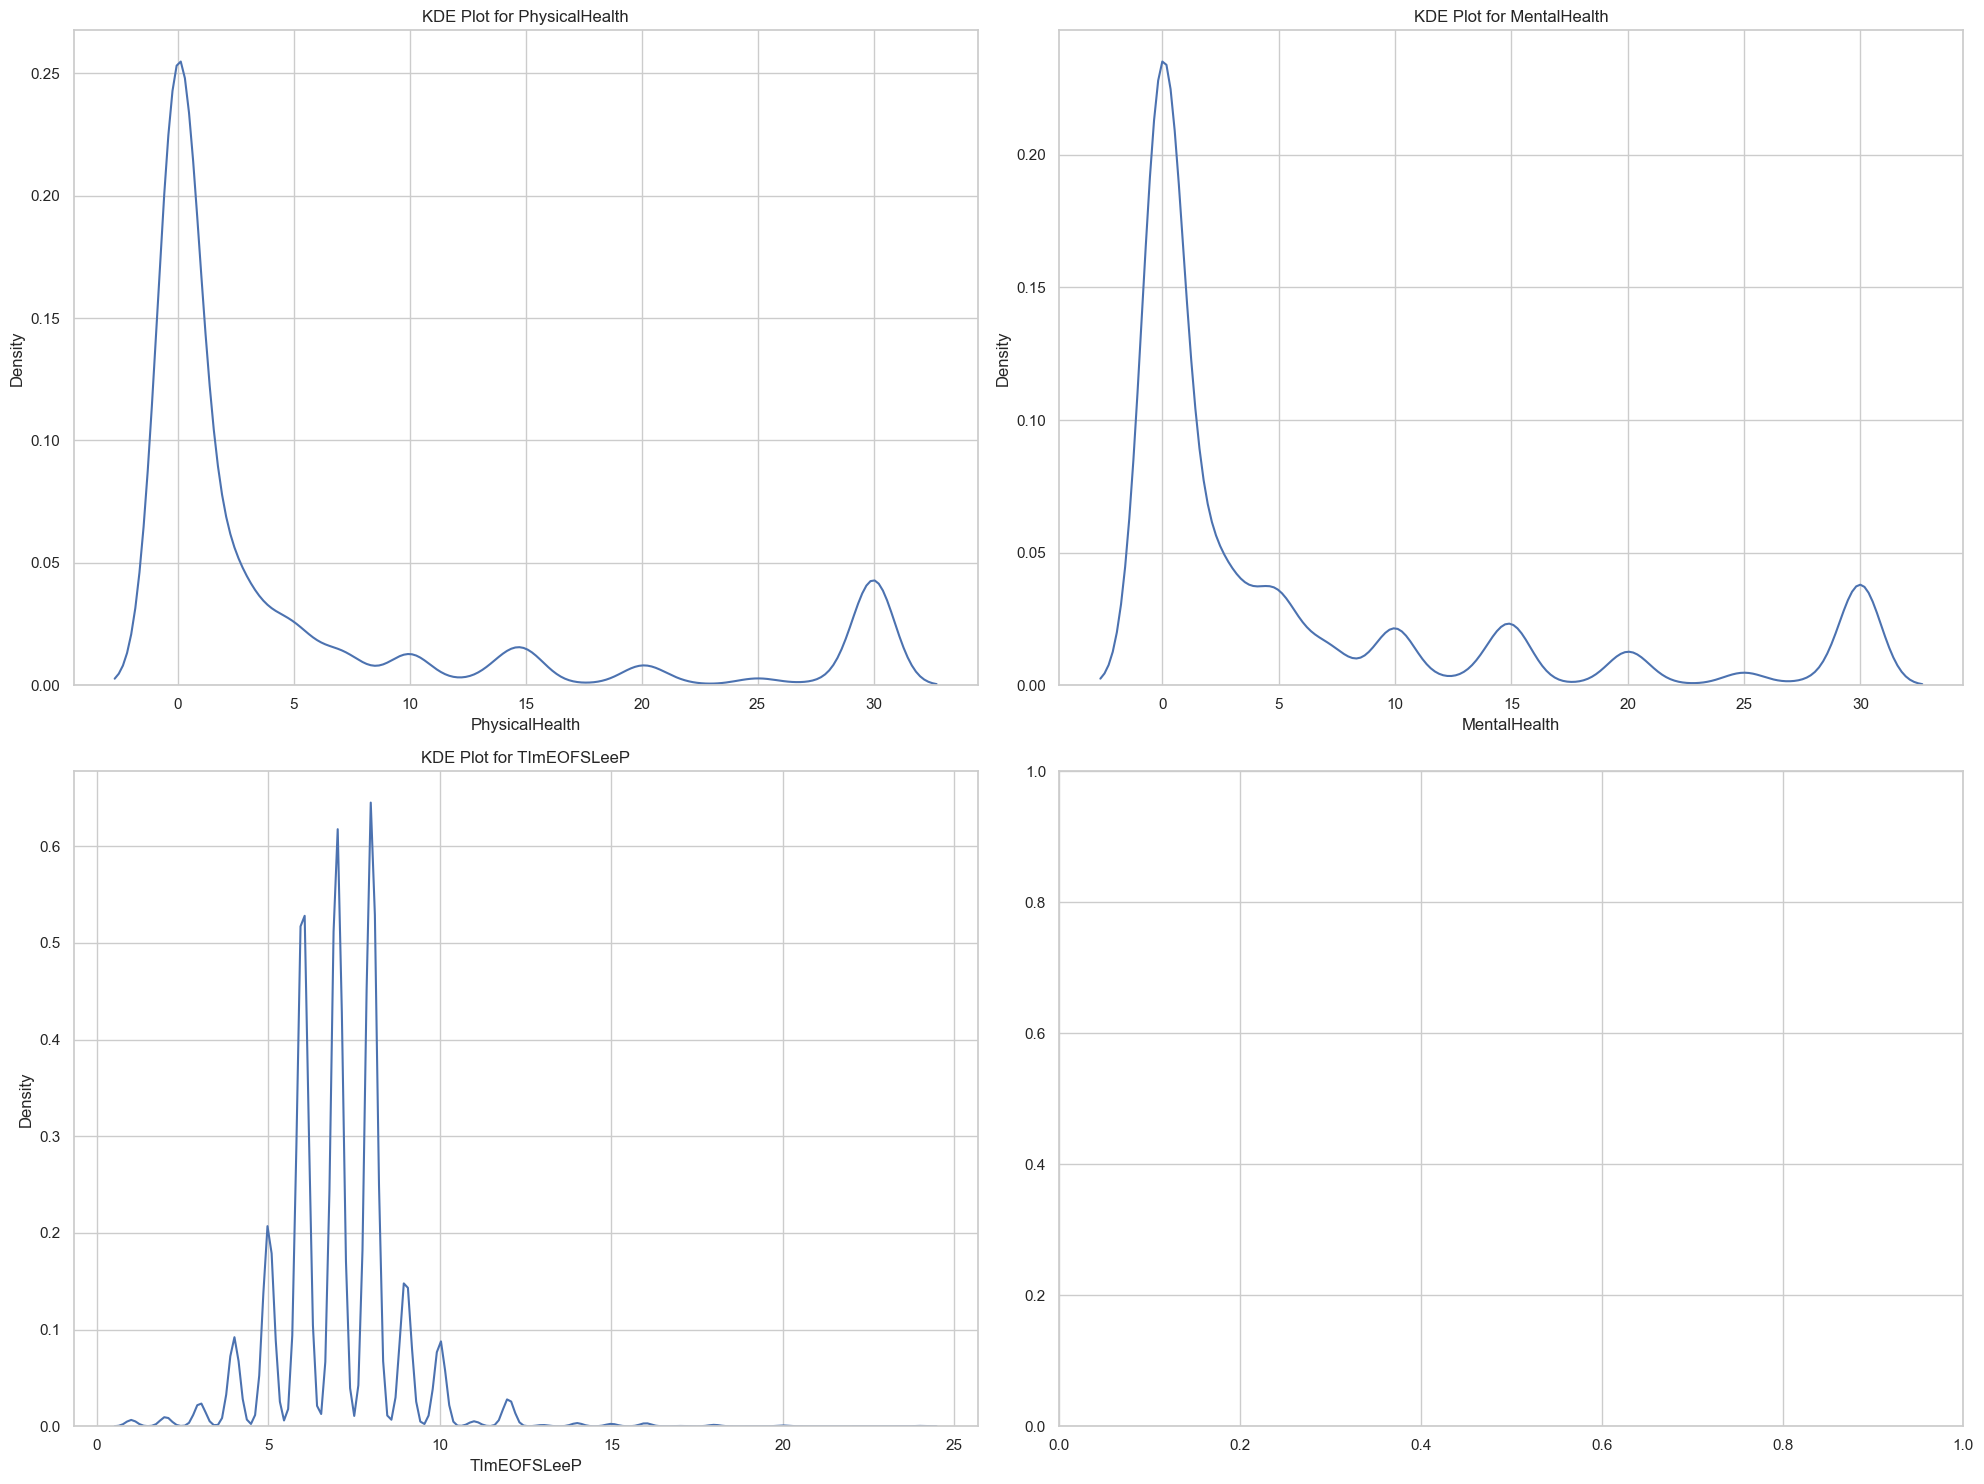

In [35]:
plot_dist(train, train_cat_features, train_num_features)

In [36]:
# This plot shows the distirbution of the data with the label with KDE_PLOT for num _values and COUNT_PLOT for cat_values

def plot_with_label(df, cat_features, num_features):
    
    # Plot count plots for categorical variables
    fig, axes = plt.subplots(8, 2, figsize=(15, 20))
    
    for i, column in enumerate(cat_features):
        row = i // 2
        col = i % 2
        sns.countplot(x=column, data=df, ax=axes[row, col],hue="HeartDisease")
        axes[row, col].set_title(f'count Plot for {column}')
        
        for p in axes[row, col].patches:
            height = p.get_height()
            axes[row, col].text(p.get_x() + p.get_width() / 2., height + 5, f'{height / len(df):.1%}', ha="center")
    
    plt.tight_layout()
    plt.show()
    
    # Plot KDE plots for numerical variables
    fig, axes = plt.subplots(2, 2, figsize=(20, 15))
    
    for i, column in enumerate(num_features):
        row = i // 2
        col = i % 2
        sns.kdeplot(x=column, data=df, ax=axes[row, col],hue="HeartDisease",fill=True)
        axes[row, col].set_title(f'KDE Plot for {column}')
    
    plt.tight_layout()
    plt.show()

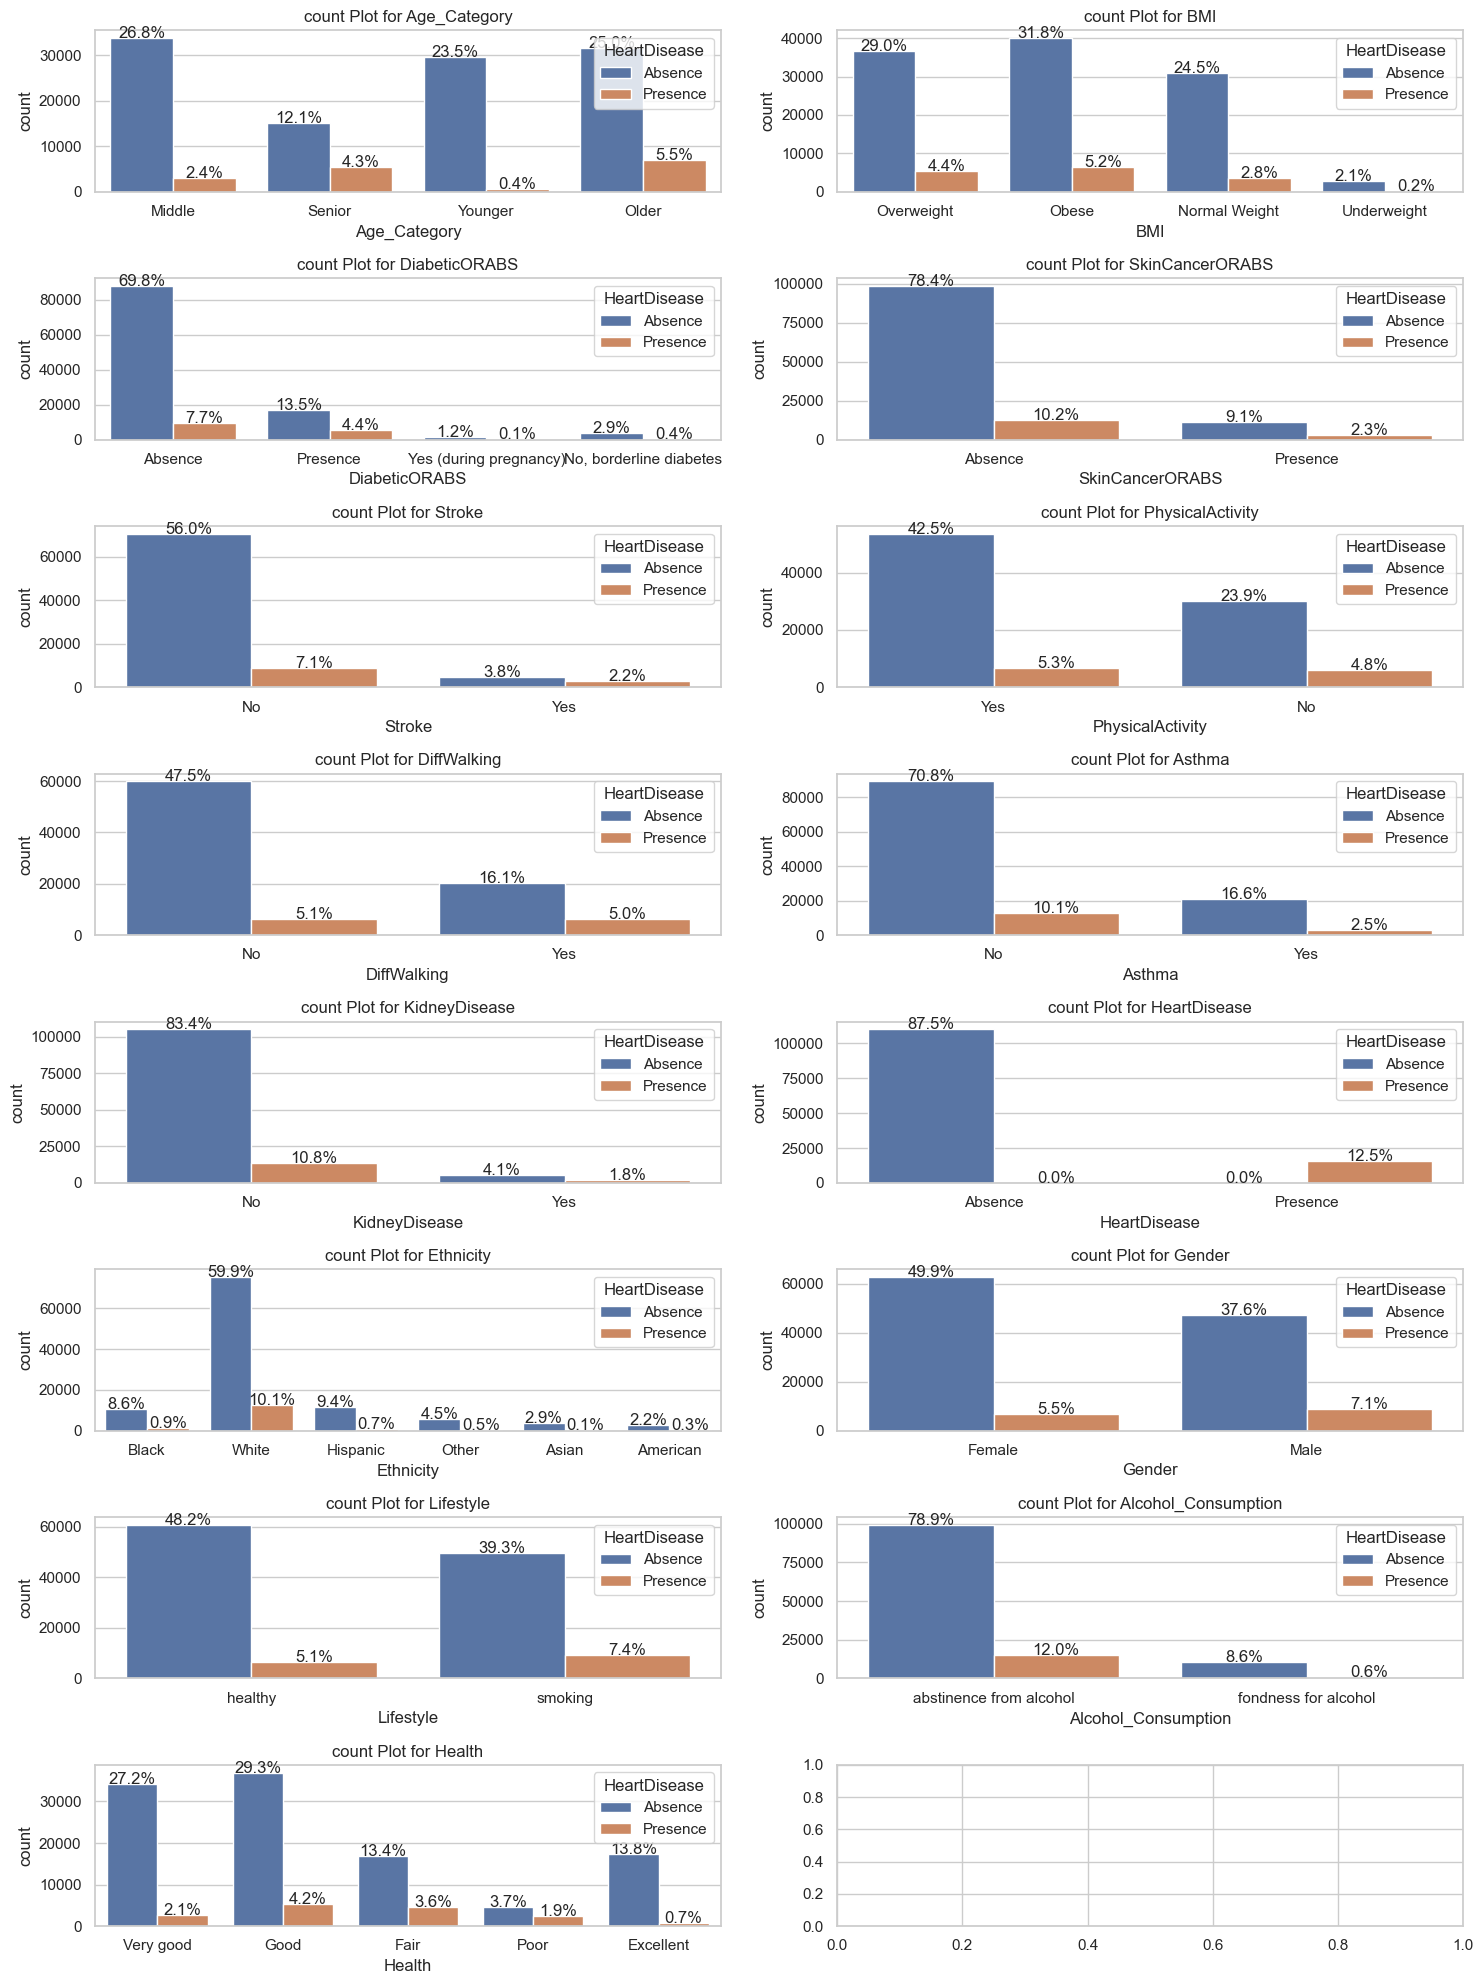

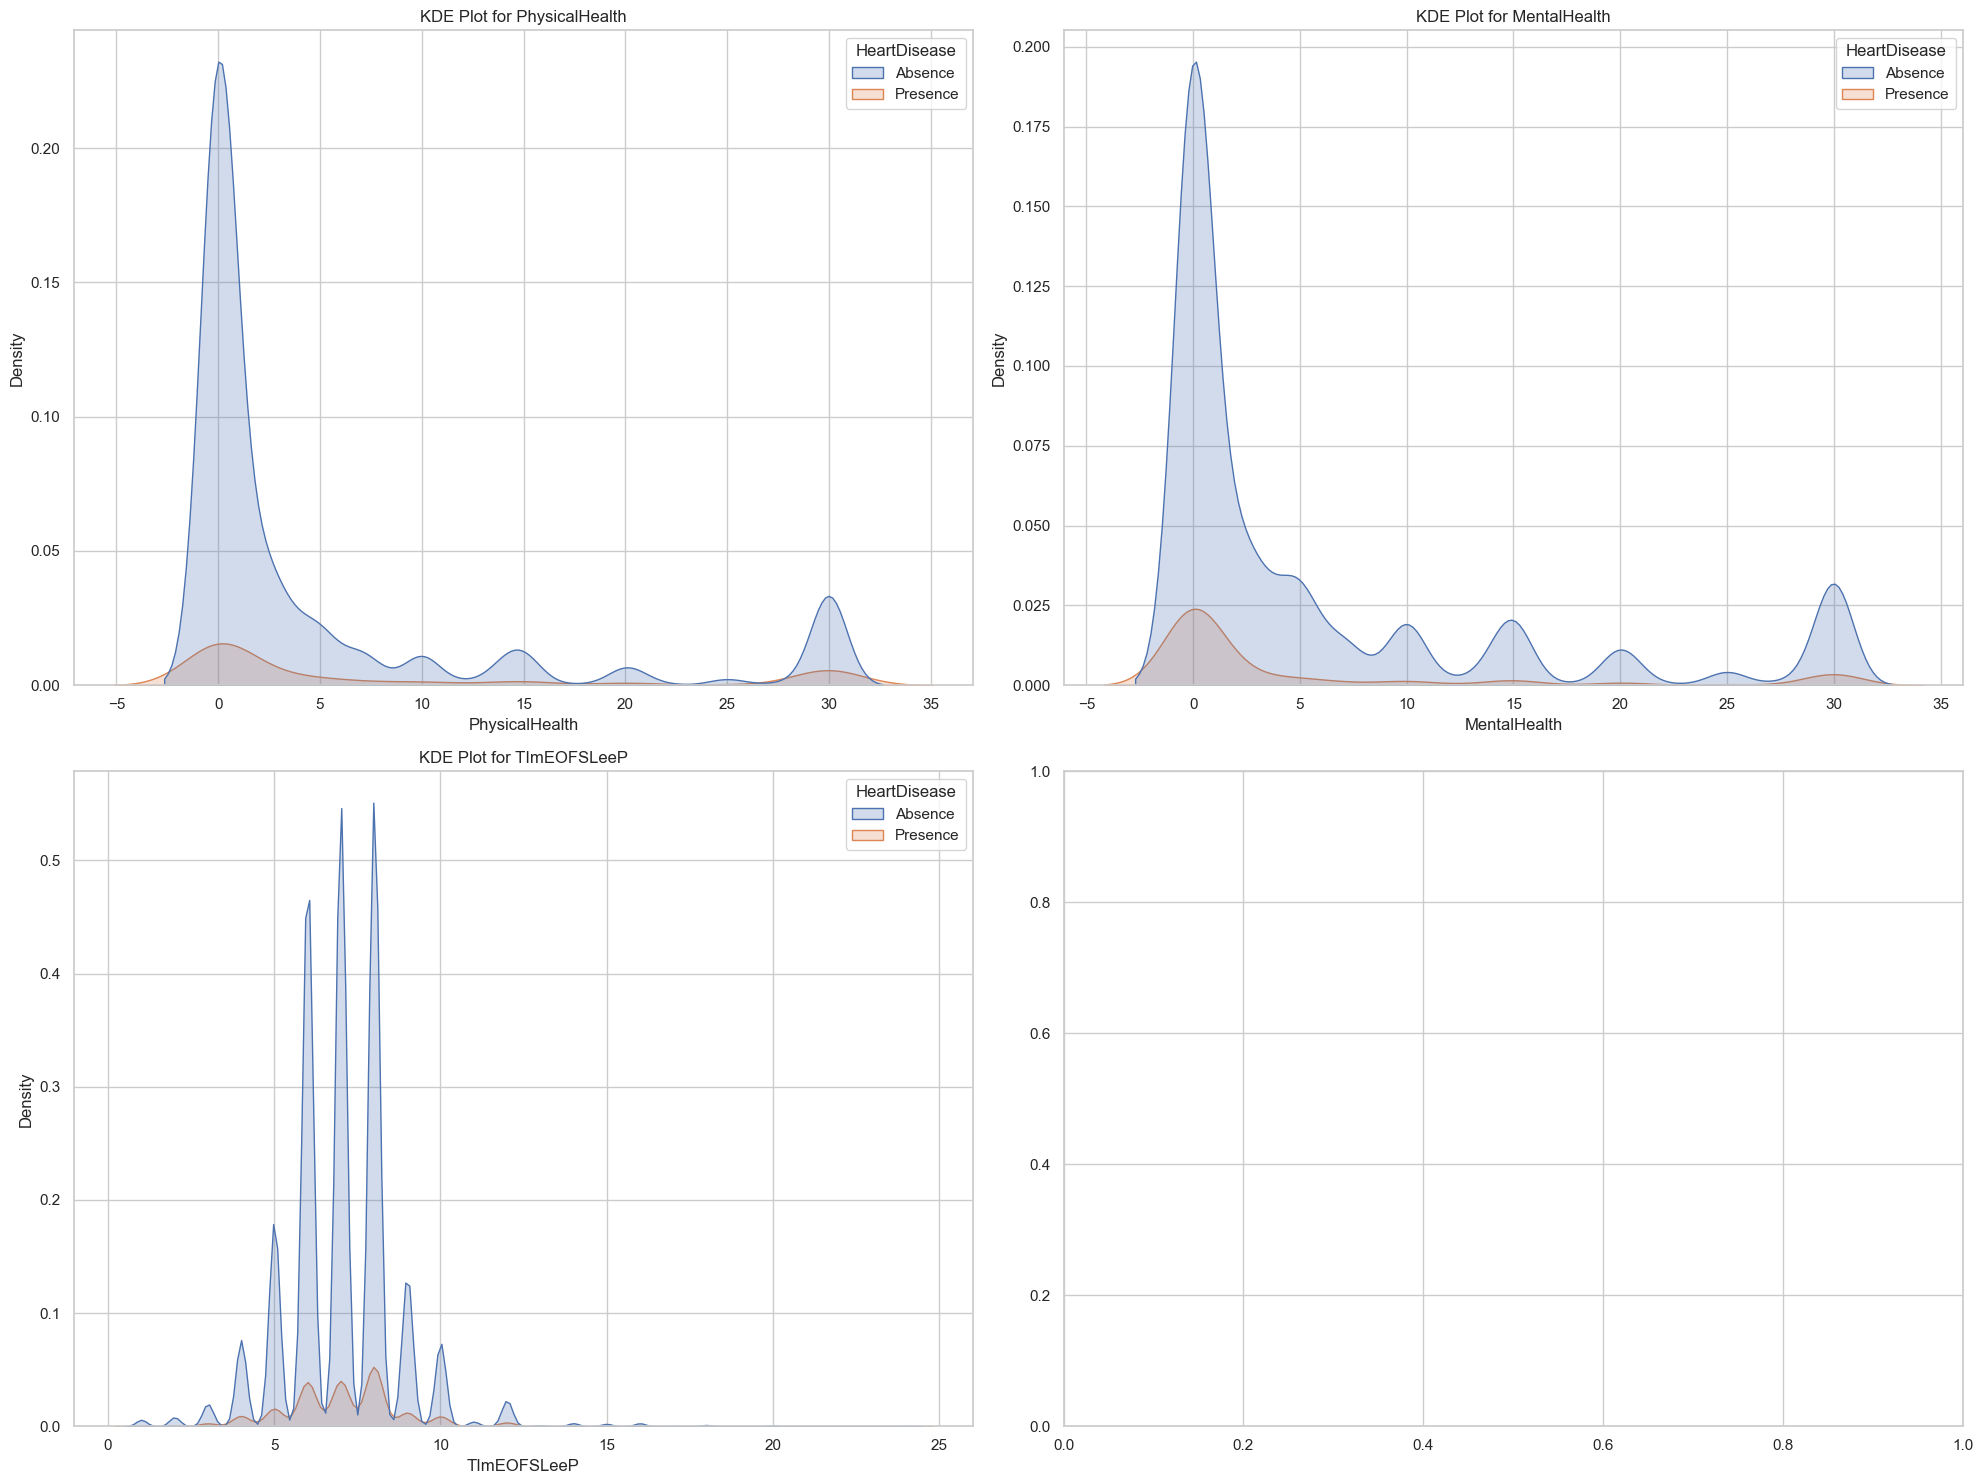

In [37]:
plot_with_label(train, train_cat_features, train_num_features)

## Outliers

In [38]:
# This shows the boxplot of the num_values to detect the outliers

def box_plot(df,num_features):
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    
    for i, column in enumerate(num_features):
        row = i // 2
        col = i % 2
        sns.boxplot(x=column, data=df, ax=axes[row, col])
        axes[row, col].set_title(f'BOX Plot for {column}')
    
    plt.tight_layout()
    plt.show()

In [39]:
# This shows the PCT of the outliers in the data

def outliers_pct(df):

    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df < lower_bound) | (df > upper_bound)).sum()
    outliers_pct = (outliers / len(df))*100

    return outliers_pct

In [40]:
# This shows the values of the outliers in the data

def outliers_values(df):
    
    outlier_values_per_feature = {}  # This will store the outlier values
    
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound))
        outlier_values = np.unique(df[column][outliers])
        
        outlier_values_per_feature[column] = outlier_values  # Store outlier values for this feature
    
    return outlier_values_per_feature

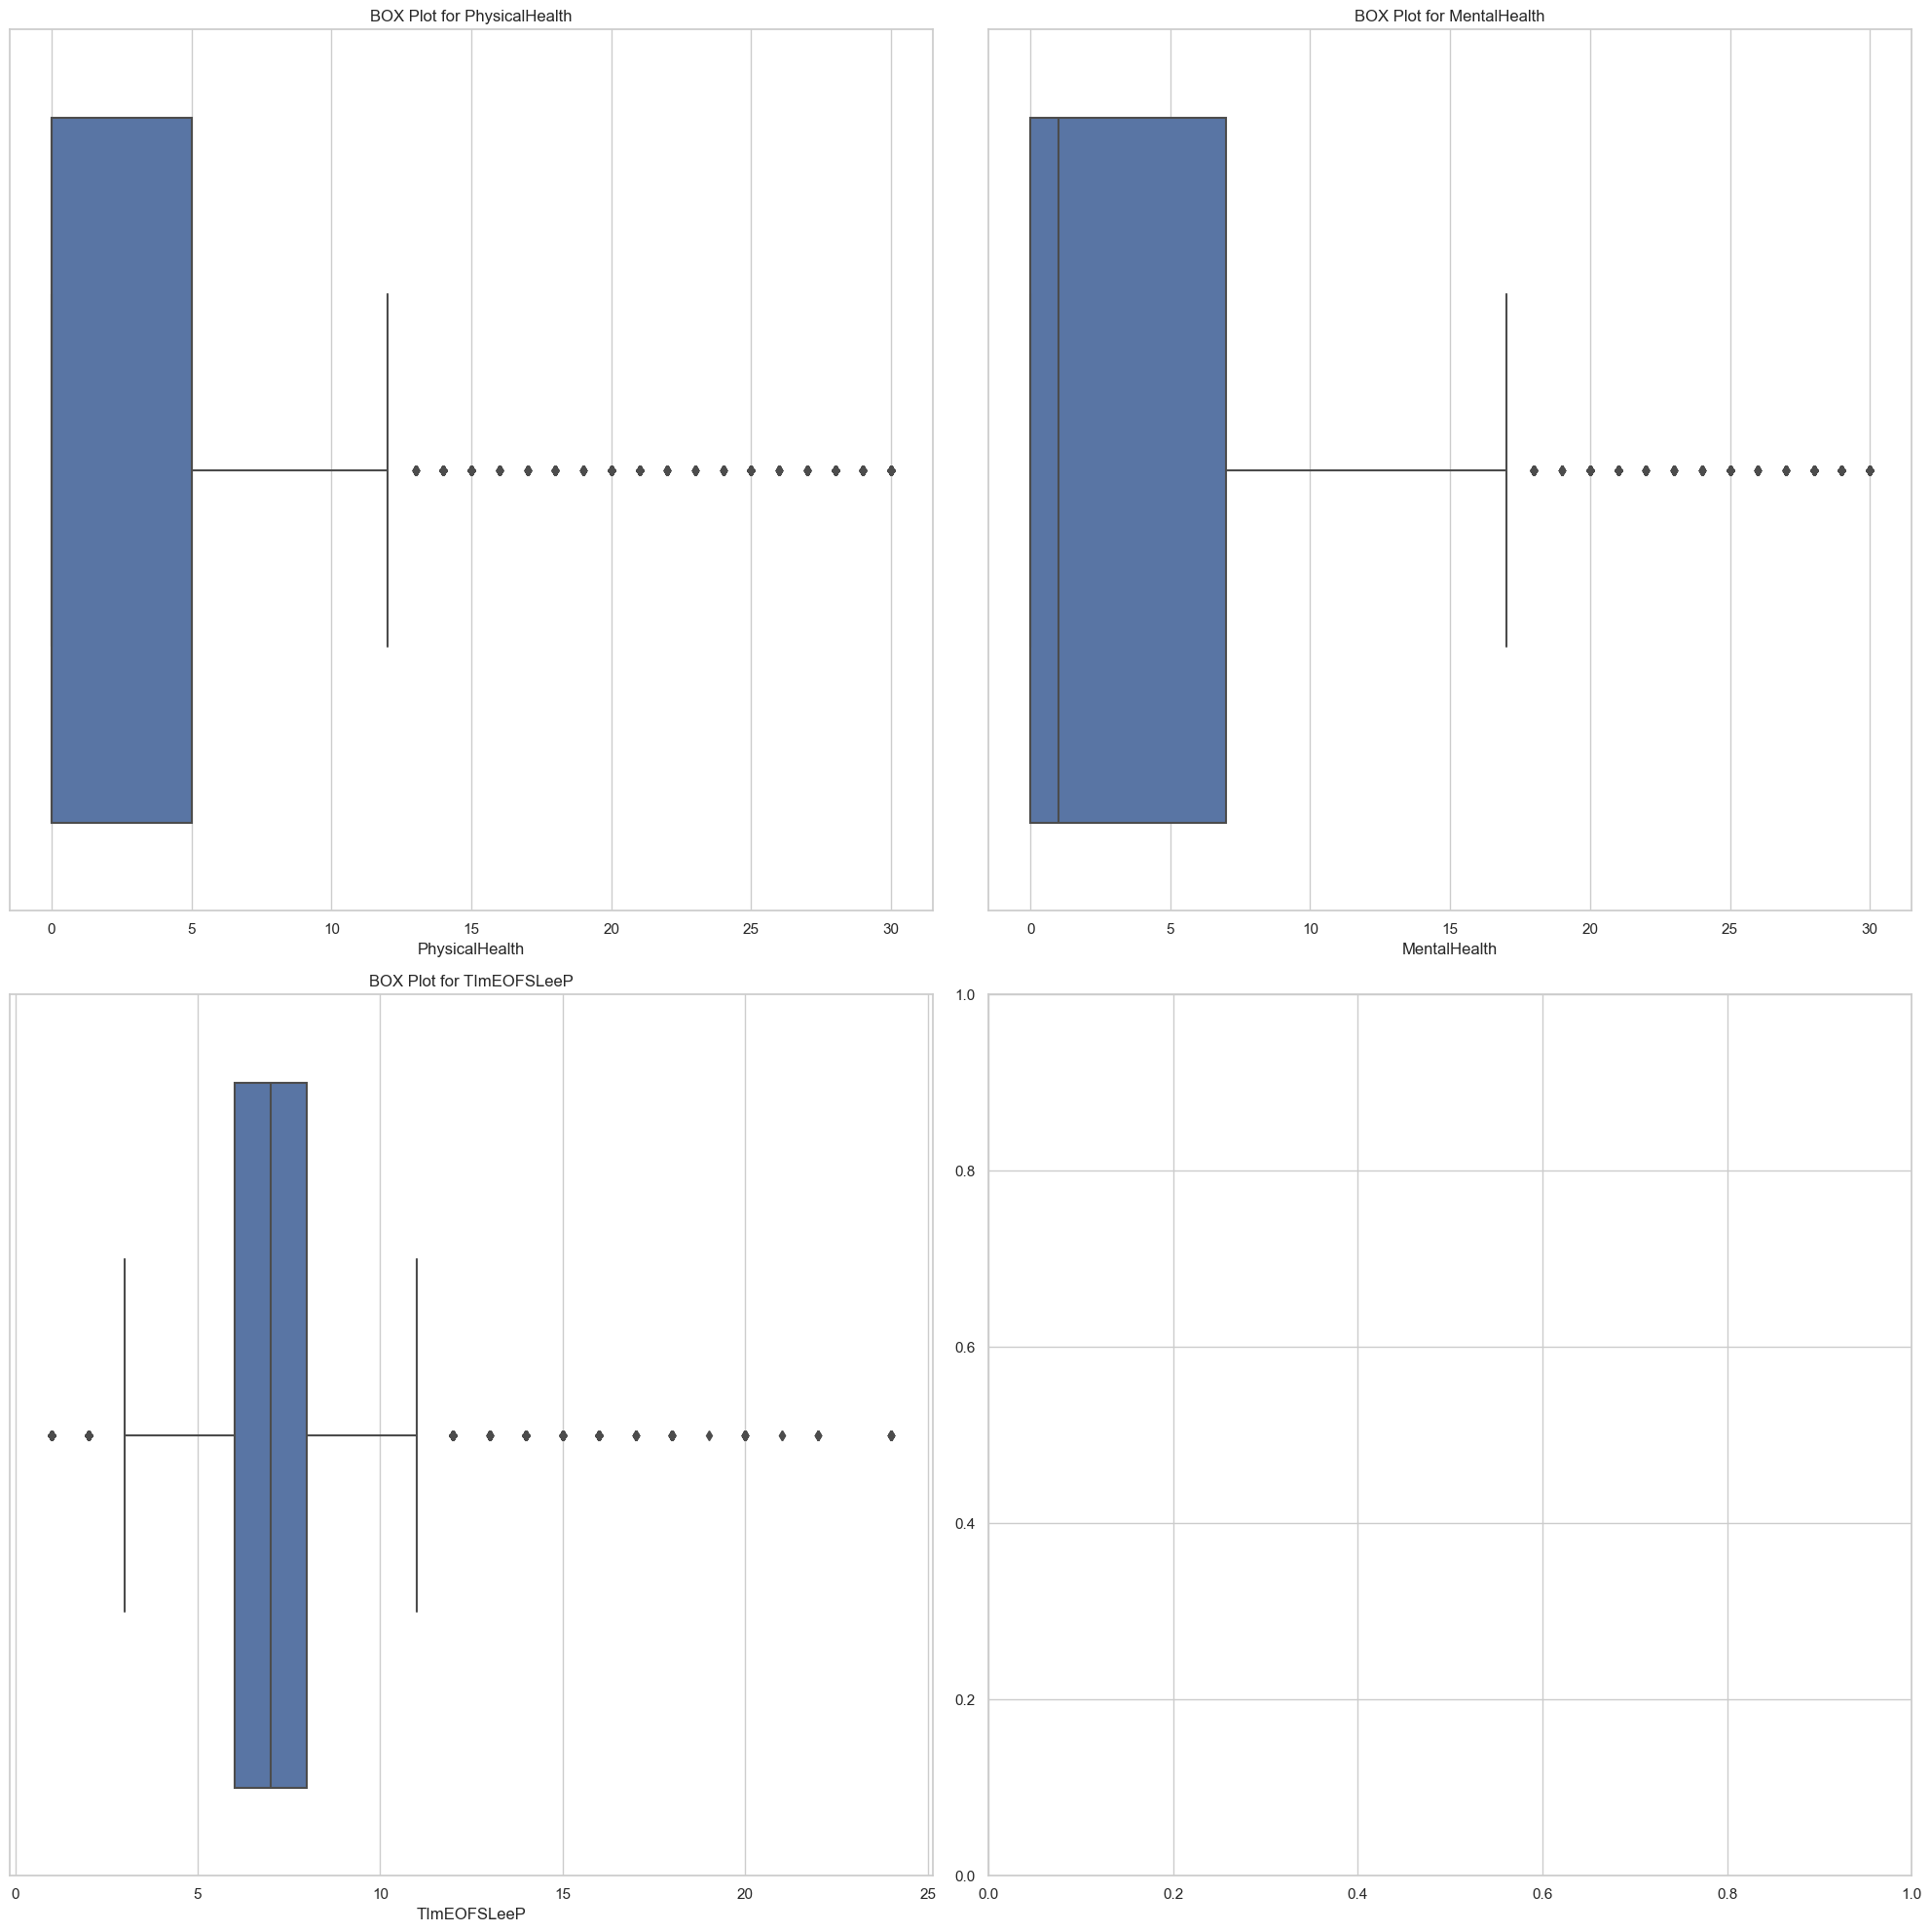

In [41]:
box_plot(train,train_num_features)

In [42]:
outliers_values(train[train_num_features])

{'PhysicalHealth': array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30.]),
 'MentalHealth': array([18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.]),
 'TImEOFSLeeP': array([ 1.,  2., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
        24.])}

In [43]:
outliers_pct(train[train_num_features])

PhysicalHealth    17.058609
MentalHealth      12.951554
TImEOFSLeeP        2.358798
dtype: float64

* 'PhysicalHealth' has 17.06% outliers, 'MentalHealth' has 12.95%, and 'Time of Sleep' has 2.36%. 
* The first two columns have a higher presence of outliers which should be fixed to get accurate analysis.



## Skewness

In [44]:
# This show the skewness of the data

train[train_num_features].skew()

PhysicalHealth    1.818132
MentalHealth      1.667184
TImEOFSLeeP       0.836128
dtype: float64

* These columns seem to have a right-skewed distribution. I'll work on correcting this later to ensure more accurate analysis.


# **Summary :**  

#### **Based on the analysis, it was observed that: Presence of Heart Disease: 12.5% ,  Absence of Heart Disease: 87.5%. This indicates a lower prevalence of heart disease cases**

1. **Dropped 'id' Column:**
   - Removed as it didn't provide useful information.

2. **Addressing Missing Values:**
   - Identified a significant number of missing values, to be handled later.
   - Stroke: 30.90%
   - DiffWalking: 26.34%
   - PhysicalActivity: 23.47%

3. **Extracted 5 New Columns from 'Person Story':**
   - Added for improved relevance.

4. **Discretized BMI:**
   - Due to a large number of unique values, BMI categories were consolidated into 5 groups for better interpretation.

5. **Duplicates Removed:**
   - Identified and removed 63,447 duplicates.

6. **Handling Imbalanced Data:**
   - Noted that there is imbalanced data, to be addressed later.

7. **Outliers Detected:**
   -  PhysicalHealth: 17.05%
   -  MentalHealth: 12.95%
   -  Time of Sleep: 2.35%

8. **Skewed Data:**
   -  PhysicalHealth: 1.81
   -  MentalHealth: 1.66
   -  Time of Sleep: 0.83


# Preprocessing

In [45]:
"""
The first code block calculates the means of different features,
while the second block determines the mode of categorical features.
These insights are valuable for understanding how various attributes relate to heart disease status.

"""

feature_means = train.groupby('HeartDisease').mean()

print(feature_means)

cat_f = train.select_dtypes(include=['object', 'category'])
mode_by_target = cat_f.groupby('HeartDisease').agg(lambda x: x.mode().iloc[0])

print(mode_by_target)

              PhysicalHealth  MentalHealth  TImEOFSLeeP
HeartDisease                                           
Absence             4.908936      5.922971     7.017675
Presence            8.622809      5.223720     7.096260
             Age_Category    BMI DiabeticORABS SkinCancerORABS Stroke  \
HeartDisease                                                            
Absence            Middle  Obese       Absence         Absence     No   
Presence            Older  Obese       Absence         Absence     No   

             PhysicalActivity DiffWalking Asthma KidneyDisease Ethnicity  \
HeartDisease                                                               
Absence                   Yes          No     No            No     White   
Presence                  Yes          No     No            No     White   

              Gender Lifestyle      Alcohol_Consumption Health  
HeartDisease                                                    
Absence       Female   healthy  abstinence from 

## Outliers 

In [46]:
# This function finds the outliers and replace them with NaN.
def replace_outliers(df, col):
    
    Q1 = df[col].quantile(q=0.25)
    Q3 = df[col].quantile(q=0.75)
    IQR = stats.iqr(df[col])
    
    outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    df.loc[outliers, col] = np.nan
    
    return df

In [47]:
# This function removes the outliers.
def remove_outliers(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    df.drop(df[outliers].index, inplace=True)
    
    return df

In [48]:
# I observed earlier that the average PhysicalHealth scores differ based on heart disease status. 
# For those without heart disease, it's 4.90, while for those with heart disease, it's 8.62. 
# This is unlike the scores for MentalHealth and TimeOfSleep.

In [49]:
"""
I will remove outliers from the 'TimeOfSleep' column 
because some values are too low and some are too high to be valid and the percentage is 2.35% of the column .

"""
cols_to_process = ['TImEOFSLeeP']

for col in cols_to_process:
    train = remove_outliers(train, col)

In [50]:
"""
There are several measures of physical and mental health, but they typically do not use a scale from 1 to 30. 
Therefore, I'm uncertain whether dropping them would be more beneficial than retaining them. 
This is especially true for the mental health column, as both absence and presence categories have similar values. 
As a result, I have decided to retain the outliers in the MentalHealth column and will impute them based on the target variable in PhysicalHealth.

"""
cols_to_process = ['PhysicalHealth']

for col in cols_to_process:
    train = replace_outliers(train, col)

In [51]:
train.shape

(122983, 18)

## NAN Values Handiling

In [52]:
train.isnull().sum()

Age_Category               0
BMI                        0
DiabeticORABS              0
SkinCancerORABS            0
Stroke                 38142
PhysicalHealth         20564
MentalHealth               0
PhysicalActivity       29043
DiffWalking            32590
TImEOFSLeeP                0
Asthma                     0
KidneyDisease              0
HeartDisease               0
Ethnicity                  0
Gender                     0
Lifestyle                  0
Alcohol_Consumption        0
Health                     0
dtype: int64

In [53]:
test.isnull().sum()

ID                         0
Age_Category               0
BMI                        0
DiabeticORABS              0
SkinCancerORABS            0
Stroke                 32388
PhysicalHealth             0
MentalHealth               0
PhysicalActivity       25950
DiffWalking            29024
TImEOFSLeeP                0
Asthma                     0
KidneyDisease              0
Ethnicity                  0
Gender                     0
Lifestyle                  0
Alcohol_Consumption        0
Health                     0
dtype: int64

In [54]:
def impute_column(row, column_name):
    
    if pd.isnull(row[column_name]):
        if row['HeartDisease'] == 'Absence':
            return 4.908936
        elif row['HeartDisease'] == 'Presence':
            return 8.622809
    else:
        return row[column_name]

In [55]:
columns_to_impute = ['PhysicalHealth']
for col in columns_to_impute:
    train[col] = train.apply(impute_column, args=(col,), axis=1)

In [56]:
# i will impute the outliers based on the most frequent value later .
cat_imputer = SimpleImputer(strategy = "most_frequent")

## Splitting the data

In [57]:
# splitting our train data

x_train = train.drop(columns = ["HeartDisease"])
y_train = train["HeartDisease"]
x_test = test.drop(columns = ["ID"])

categorical_features = x_train.select_dtypes(include=['object']).columns.tolist()

numerical_features = x_train.select_dtypes(include=['number']).columns.tolist()

## Skewness Handiling

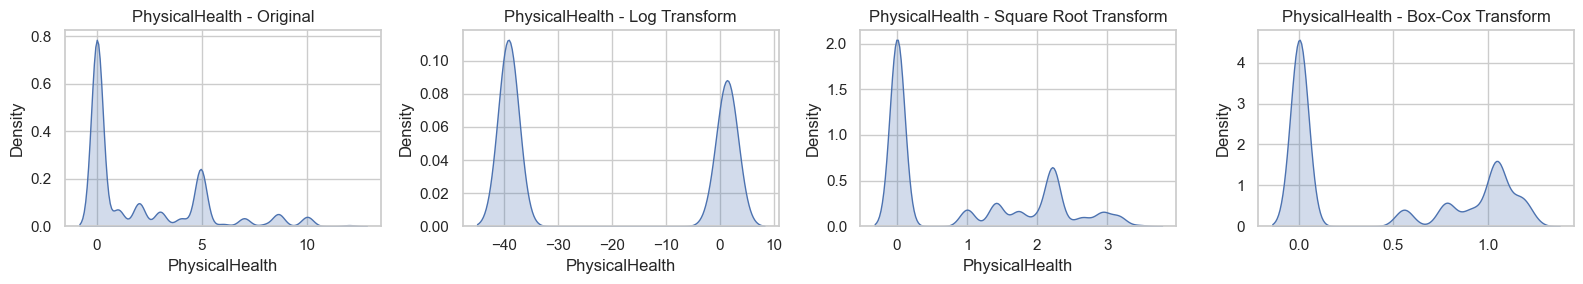

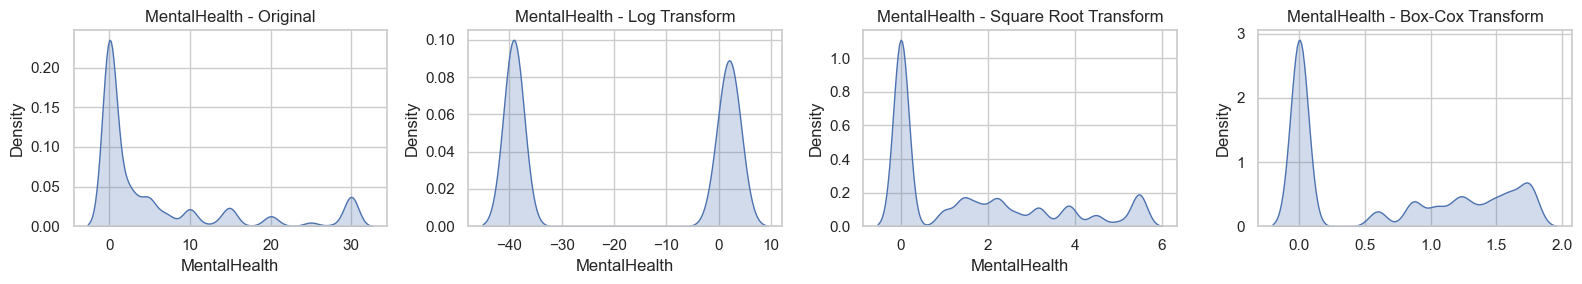

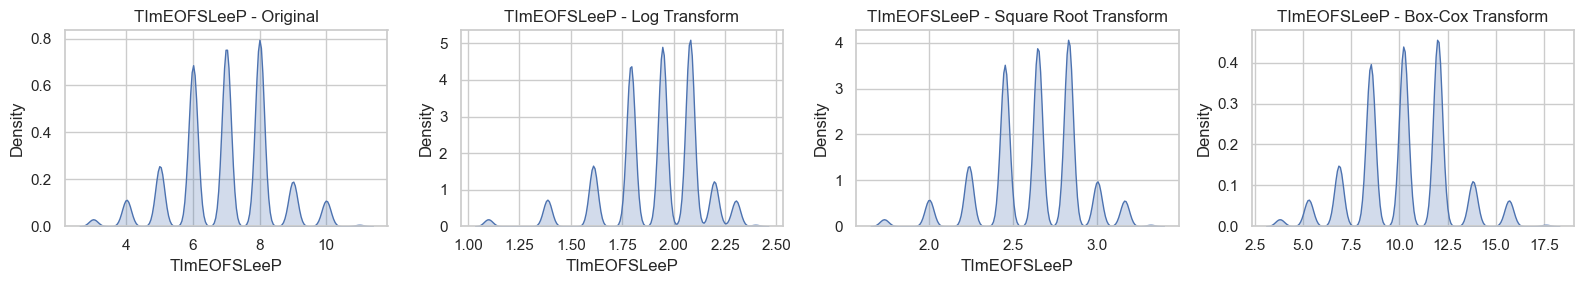

'\nNotes :\n    \n1- The log transformation requires that the input data is not equal to zero so that the result is not equal to -inf,\n        the constant (0.00000000000000001) added is chosen to be very small to avoid significant distortions to the original data.\n2- The Box-Cox transformation requires that the input data is strictly positive,\n        so x + 1 is used to shift all values up by 1, ensuring they are positive.\n'

In [59]:
# Define the transformations
transformations = [
    ('Original', lambda x: x),
    
    ('Log Transform', lambda x: np.log(x+0.00000000000000001)),
    
    ('Square Root Transform', lambda x: np.sqrt(x)),
    
    ('Box-Cox Transform', lambda x: stats.boxcox(x + 1)[0])
]

# Loop through numerical columns and apply transformations and show them in KDE plots

for col in numerical_features:
    plt.figure(figsize=(16, 3))
    for i, (transform_name, transform_func) in enumerate(transformations):
        plt.subplot(1, 4, i + 1)
        transformed_data = transform_func(x_train[col])
        sns.kdeplot(transformed_data, fill=True)
        plt.title(f'{col} - {transform_name}')
    plt.tight_layout()
    plt.show()
    
"""
Notes :
    
1- The log transformation requires that the input data is not equal to zero so that the result is not equal to -inf,
        the constant (0.00000000000000001) added is chosen to be very small to avoid significant distortions to the original data.
2- The Box-Cox transformation requires that the input data is strictly positive,
        so x + 1 is used to shift all values up by 1, ensuring they are positive.
"""

In [60]:
skewness_x_train = pd.DataFrame(columns=["Column", "Original Skewness", "Transformed Skewness"])

# Loop through numerical columns and compare skewness for each transformation
for col in numerical_features:
    original_skewness = x_train[col].skew()
    best_transform = None
    best_skewness = float('inf')
    
    for transform_name, transform_func in transformations:
        transformed_data = transform_func(x_train[col].values)  
        transformed_series = pd.Series(transformed_data)  
        skewness = transformed_series.skew()
        
        if abs(skewness) < abs(best_skewness):
            best_skewness = skewness
            best_transform = transform_name
    
    skewness_x_train = skewness_x_train.append({"Column": col, "Original Skewness": original_skewness, "Transformed Skewness": best_skewness, "Best Transformation": best_transform}, ignore_index=True)

print(skewness_x_train)

           Column  Original Skewness  Transformed Skewness Best Transformation
0  PhysicalHealth           1.229899              0.191538       Log Transform
1    MentalHealth           1.682117             -0.014608       Log Transform
2     TImEOFSLeeP          -0.152293             -0.002319   Box-Cox Transform


In [61]:
def log_transform(train, columns_to_transform):
    for column in columns_to_transform:
        train[column] = np.log(train[column] + 0.00000000000000001)
    return train

In [62]:
# Define the columns you want to transform
columns_to_transform = ['PhysicalHealth','MentalHealth']

# Applying log transformation to selected columns
x_train = log_transform(x_train, columns_to_transform)

## Pipelines

In [63]:
print(y_train.shape)
print(x_train.shape)
print(x_test.shape)

(122983,)
(122983, 17)
(111766, 17)


In [64]:
label_encoder = LabelEncoder()

In [65]:
numerical_pipeline = Pipeline([
    ('min_max_scaling', MinMaxScaler())
])

In [66]:
categorical_pipeline = Pipeline([
    ("cat_imputer", cat_imputer),
    ("encoder", OrdinalEncoder())
])

In [67]:
full_pipeline = ColumnTransformer([
    ("cat", categorical_pipeline, categorical_features),
    ("num", numerical_pipeline, numerical_features),
], remainder = "passthrough")

In [68]:
x_train = full_pipeline.fit_transform(x_train)
y_train = label_encoder.fit_transform(y_train)
x_test = full_pipeline.transform(x_test)

# Modeling

## Baseline model

In [69]:
"""
The most suitable baseline for our imbalanced data will be a model that blindly predicts the majority class.
I will use sklearn DummyClassifier for this purpose.

"""

# Create a baseline model
base = DummyClassifier(strategy="constant", constant=0)

# Perform cross-validation to estimate model performance
accuracy_scores = cross_val_score(base, x_train, y_train, cv=5, scoring='accuracy')
f1_scores = cross_val_score(base, x_train, y_train, cv=5, scoring='f1')
roc_auc_scores = cross_val_score(base, x_train, y_train, cv=5, scoring='roc_auc')
log_loss_scores = - cross_val_score(base, x_train, y_train, cv=5, scoring='neg_log_loss')

# Print the average scores
print(f"Your baseline model achieves average accuracy = {accuracy_scores.mean()}")
print(f"Your baseline model achieves average f1 = {f1_scores.mean()}")
print(f"Your baseline model achieves average roc_auc = {roc_auc_scores.mean()}")
print(f"Your baseline model achieves average log_loss = {log_loss_scores.mean()}")

Your baseline model achieves average accuracy = 0.8756657425025944
Your baseline model achieves average f1 = 0.0
Your baseline model achieves average roc_auc = 0.5
Your baseline model achieves average log_loss = 4.481460881629728


* The baseline model is entirely randomized, yet it still manages to achieve an accuracy of 87.56%.

## OverSampling

In [70]:
# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE only to the training data
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

## Modeling

In [71]:
models = [
    RandomForestClassifier(
        max_depth=7,
        n_estimators=300, 
        random_state=42
    ),
    
    LogisticRegression(
        C=0.1,
        penalty='l2',
        random_state=42
    ),
      
    XGBClassifier(
        n_estimators= 200,
        learning_rate= 0.2,
        max_depth=3,
        random_state= 42,
        ),
    
    LGBMClassifier(
        n_estimators= 300,
        learning_rate= 0.2,
        random_state= 42
    ),
                   
    CatBoostClassifier(
        n_estimators= 300,
        random_state= 42
    )
]

In [72]:
results_df = pd.DataFrame(columns=["Model", "Mean_log_loss_Score", "Mean_Accuracy_Score", "Mean_F1_Score"])

best_log_loss = 1
best_model = None
best_predictions = None

for model in models:
        
    # Step 1: Perform Cross-Validation
    cv_scores = - cross_val_score(model, x_train, y_train, cv=5, scoring='neg_log_loss') 
    cv_scores_acc =  cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    cv_scores_f1 =  cross_val_score(model, x_train, y_train, cv=5, scoring='f1')
    
    cv_scores_mean = cv_scores.mean()
    cv_scores_acc_mean = cv_scores_acc.mean()
    cv_scores_f1_mean = cv_scores_f1.mean()
        
    # Step 2: Print the cross-validation scores
    print(f'Mean log_loss Score: {cv_scores_mean}')
    print(f'Mean accuracy Score: {cv_scores_acc_mean}')
    print(f'Mean f1 Score: {cv_scores_f1_mean}')

    # Step 3: Train the Model
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    

    # Step 4: Check if this model has the best log loss so far
    if cv_scores_mean < best_log_loss:
        best_log_loss = cv_scores_mean
        best_model = model
        best_predictions = y_pred

    # Append results to the DataFrame
    results_df = results_df.append({
        "Model": model.__class__.__name__,
        "Mean_log_loss_Score": cv_scores_mean,
        "Mean_Accuracy_Score": cv_scores_acc_mean,
        "Mean_F1_Score": cv_scores_f1_mean
        }, ignore_index=True)

model_name = best_model.__class__.__name__
mean_log_loss_score = best_log_loss

print(f'Best Model: {model_name}')
print(f'Mean log_loss Score: {mean_log_loss_score}')
print('-'*30)

# Now, best_predictions will contain the predictions from the best model

Mean log_loss Score: 0.26265272024865177
Mean accuracy Score: 0.9109551671431027
Mean f1 Score: 0.4465302380834208
Mean log_loss Score: 0.33126091454313905
Mean accuracy Score: 0.8767472056114745
Mean f1 Score: 0.11758324900946071
Mean log_loss Score: 0.22941291315895543
Mean accuracy Score: 0.9111828447876235
Mean f1 Score: 0.4730651862868044
[LightGBM] [Info] Number of positive: 12233, number of negative: 86153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 98386, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.124337 -> initscore=-1.951988
[LightGBM] [Info] Start training from score -1.951988
[LightGBM] [Info] Number of positive: 12233, number of negative: 86153
[LightGBM] [Info] Auto-choo

In [73]:
results_df_sorted = results_df.sort_values(by='Mean_log_loss_Score', ascending=True)
results_df_sorted

,Model,Mean_log_loss_Score,Mean_Accuracy_Score,Mean_F1_Score
2,XGBClassifier,0.229413,0.911183,0.473065
4,CatBoostClassifier,0.230573,0.910459,0.488748
3,LGBMClassifier,0.231644,0.911890,0.508301
0,RandomForestClassifier,0.262653,0.910955,0.446530
1,LogisticRegression,0.331261,0.876747,0.117583


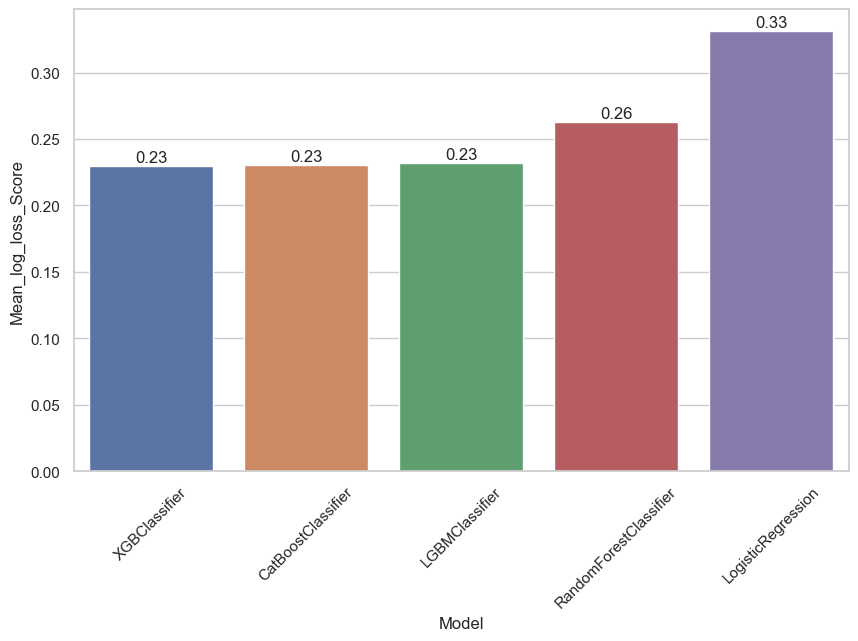

In [74]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=results_df_sorted, x='Model', y='Mean_log_loss_Score')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.003, f'{height:.2f}', ha="center")
    
plt.xticks(rotation=45)

plt.show()

# Submission

In [75]:
np.unique(y_pred)

array([0, 1], dtype=int64)

In [76]:
# Assuming test.id and original_outcome are Series or arrays
submission = pd.DataFrame({'ID': test.ID.values, 'HeartDisease': y_pred})
submission

,ID,HeartDisease
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
111761,111761,0
111762,111762,0
111763,111763,0
111764,111764,0


In [77]:
submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
